<a href="https://colab.research.google.com/github/SoarAway/mlpc/blob/main/MLPC_Indv_ver4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing dataset

df_real = pd.read_csv(DATA_DIR_REAL, header = 0)

DATA_DIR_FAKE ="/content/Fake.csv"
df_fake = pd.read_csv(DATA_DIR_FAKE, header = 0)

In [28]:
# Combining both files & one hot encoding
df_real['label'] = 0
df_fake['label'] = 1
df = pd.concat([df_real, df_fake], ignore_index=True)
display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [22]:
# Pre-processing - identifying missing values
print("Missing Data : ")
print(df.isna().sum())

# Exporting the cleaned dataset
# df.to_csv("cleaned_data.csv", index=False)

# Duplicated Data
print("\nDuplicated Data")
print(df.duplicated(subset=['text']).sum(), "rows")
df = df.drop_duplicates(subset=['text'], keep='first')

print()
print(df.info())

Missing Data : 
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Duplicated Data
6252 rows

<class 'pandas.core.frame.DataFrame'>
Index: 38646 entries, 0 to 44119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38646 non-null  object
 1   text     38646 non-null  object
 2   subject  38646 non-null  object
 3   date     38646 non-null  object
 4   label    38646 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB
None


In [29]:
# Display all rows that are considered duplicates
duplicate_rows = df[df.duplicated(subset=['text'])]

print(duplicate_rows)

                                                   title  \
166    Factbox: What is in the U.S. Republicans' fina...   
250    Aide tries to refocus U.S. tax debate after Tr...   
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
166    (Reuters) - Republicans in the U.S. Congress r...  politicsNews   
250    WASHINGTON (Reuters) - President Donald Trump’...  politicsNews   
445    WASHINGTON (Reuters) - The U.S. Senate on Thur... 

In [25]:
# Dataset Information
print(df.info())
print()
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("Subjects in Real News:", df[df['label'] == 0]['subject'].unique())
print("Subjects in Fake News:", df[df['label'] == 1]['subject'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

Number of rows: 44898
Number of columns: 5
Subjects in Real News: ['politicsNews' 'worldnews']
Subjects in Fake News: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [112]:
import pandas as pd

text_word_counts = df['text'].str.split().str.len()

print("--- Analysis of 'text' column word count ---")
print(f"Max word count: {text_word_counts.max()} words")
print(f"Min word count: {text_word_counts.min()} words")
print(f"Average word count: {text_word_counts.mean():.2f} words")
print("\nFull description of text word counts:")
print(text_word_counts.describe())

print("\n" + "="*40 + "\n")

title_word_counts = df['title'].str.split().str.len()

print("--- Analysis of 'title' column word count ---")
print(f"Max word count: {title_word_counts.max()} words")
print(f"Min word count: {title_word_counts.min()} words")
print(f"Average word count: {title_word_counts.mean():.2f} words")
print("\nFull description of title word counts:")
print(title_word_counts.describe())

--- Analysis of 'text' column word count ---
Max word count: 4753 words
Min word count: 0 words
Average word count: 222.99 words

Full description of text word counts:
count    44898.000000
mean       222.988574
std        195.815712
min          0.000000
25%        112.000000
50%        196.000000
75%        280.000000
max       4753.000000
Name: text, dtype: float64


--- Analysis of 'title' column word count ---
Max word count: 42 words
Min word count: 1 words
Average word count: 12.45 words

Full description of title word counts:
count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title, dtype: float64


In [ ]:
# Add in New Column (Location)
df['location'] = df['text'].str.extract(r'^([A-Z\s/]+)(?=\s\()')
df['location'] = df['location'].fillna("N/A")
df['text'] = df['text'].str.replace(r'^[A-Z\s/]+\s\(Reuters\)\s*-\s*', '', regex=True)


print("--- Head of DataFrame (Locations Found) ---")
print(df[['text', 'location']].head())

print("\n--- Tail of DataFrame (No Location Found) ---")
print(df[['text', 'location']].tail())

--- Head of DataFrame (Locations Found) ---
                                                text            location
0  The head of a conservative Republican faction ...          WASHINGTON
1  Transgender people will be allowed for the fir...          WASHINGTON
2  The special counsel investigation of links bet...          WASHINGTON
3  Trump campaign adviser George Papadopoulos tol...          WASHINGTON
4  President Donald Trump called on the U.S. Post...  SEATTLE/WASHINGTON

--- Tail of DataFrame (No Location Found) ---
                                                    text location
44893  21st Century Wire says As 21WIRE reported earl...      N/A
44894  21st Century Wire says It s a familiar theme. ...      N/A
44895  Patrick Henningsen  21st Century WireRemember ...      N/A
44896  21st Century Wire says Al Jazeera America will...      N/A
44897  21st Century Wire says As 21WIRE predicted in ...      N/A


In [23]:
# Pre-processing - text cleaning
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions

lemmatizer = WordNetLemmatizer()
stopword_list = ['one', 'two','said', 'us', 'also']

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove (Reuters)
    text = re.sub(r'\(reuters\)', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(stopword_list)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove username
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Expand contractions
    text = contractions.fix(text)
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington head conservative republican factio...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,washington transgender people allowed first ti...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington special counsel investigation links...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,washington trump campaign adviser george papad...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,seattlewashington president donald trump calle...,politicsNews,"December 29, 2017",0


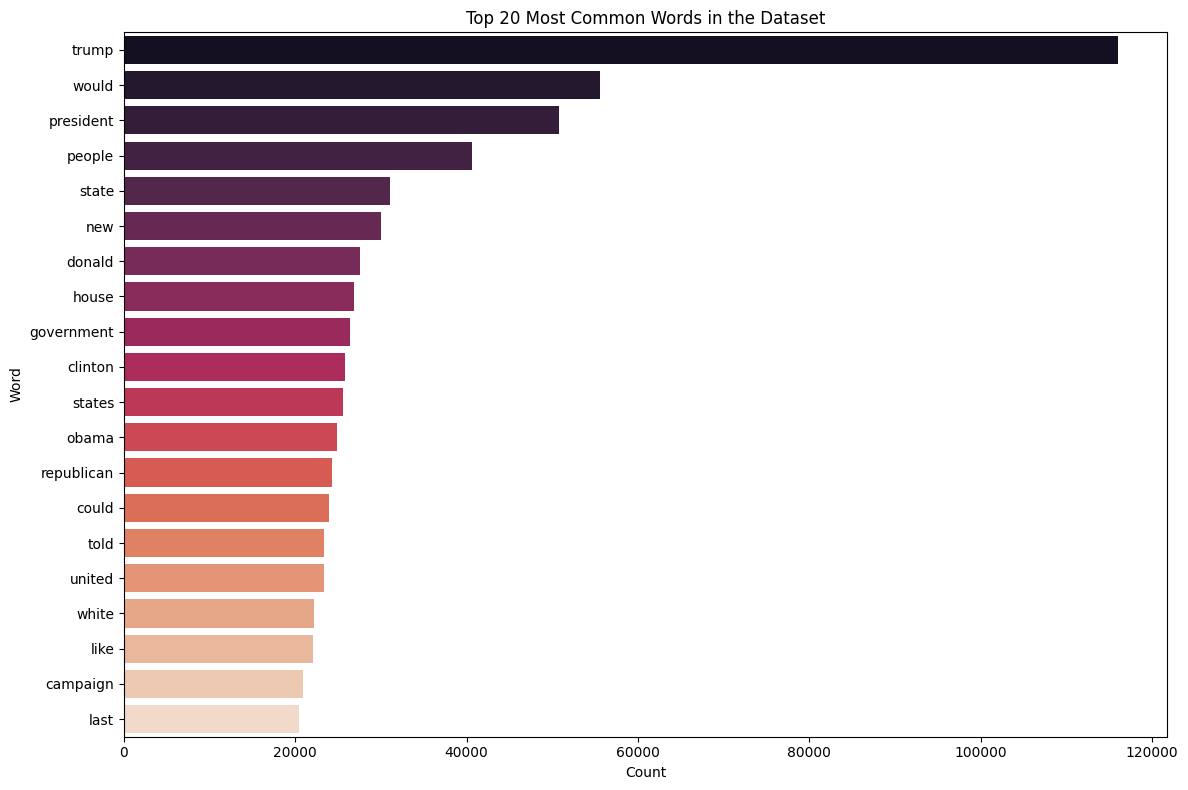

In [ ]:
all_words = [word for sentence in df['text'] for word in str(sentence).lower().split()]

word_counts = Counter(all_words)

df_top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')
plt.title('Top 20 Most Common Words in the Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Pre-processing - Initializing variables & Splitting dataset
# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled.drop('label', axis=1)
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# 7. Create a TF-IDF + Logistic Regression pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# 8. Train the model
pipeline.fit(x_train['text'], y_train)

# 9. Evaluate the model
y_pred = pipeline.predict(x_test['text'])

print("Classification Report (Logistics Regression):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm_logi = confusion_matrix(y_test, y_pred)
print(cm_logi)

ValueError: Found input variables with inconsistent numbers of samples: [5, 35918]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4330
           1       0.99      0.98      0.98      4650

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
[[4268   62]
 [  83 4567]]


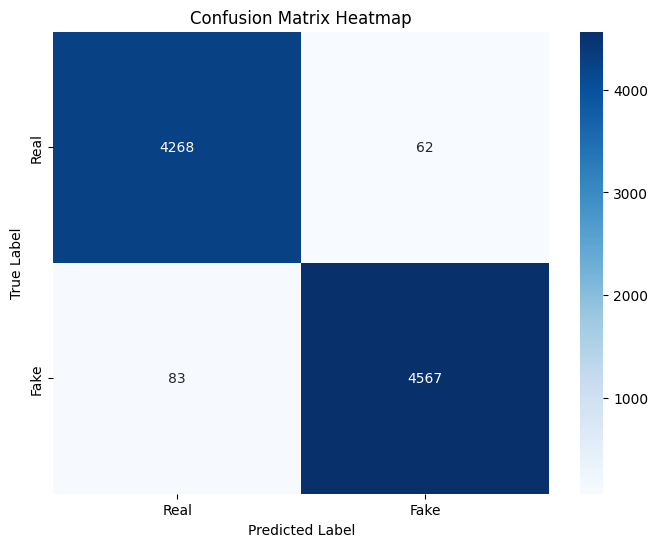

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df[['text', 'title']]
y = df['label']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer(stop_words='english', max_features=5000)

# 4. Use ColumnTransformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text'), # Apply TF-IDF to the 'text' column
        ('title', TfidfVectorizer(stop_words='english', max_features=1000), 'title'), # Apply TF-IDF to the 'title' column
    ],
    remainder='drop' # Drop any columns that are not specified
)

# 5. Create the final pipeline with the preprocessor and the model
# This chains the preprocessing and modeling steps together.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 6. Train the entire pipeline on the training data
model_pipeline.fit(X_train, y_train)

# 7. Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm_logi = confusion_matrix(y_test, y_pred)
print(cm_logi)

# Choosing which confusion matrix
cm = cm_logi
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# Pre-processing (DT / RF) - Vectorization & Splitting dataset

# Initialize vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words= 'english'
)

x_train_dt = vectorizer.fit_transform(x_train['text'])
x_test_dt = vectorizer.transform(x_test['text'])

print("Decision Tree & Random Forest Model :")
print(f"Training set size: {x_train_dt.shape[0]}")
print(f"Testing set size: {x_test_dt.shape[0]}")


# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train_dt, y_train)

y_pred_dt = dt_model.predict(x_test_dt)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.show()


Decision Tree & Random Forest Model :
Training set size: 35918
Testing set size: 8980
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4311
           1       0.92      0.95      0.94      4669

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Confusion Matrix:
[[3933  378]
 [ 234 4435]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4311
           1       0.98      0.98      0.98      4669

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
[[4210  101]
 [ 110 4559]]


In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_dt, y_train)

y_pred_rf = rf_model.predict(x_test_dt)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.show()

NameError: name 'x_train_dt' is not defined

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Step 1: Data Preparation

# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled.drop('label', axis=1)
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Parameters for tokenization and padding
vocab_size = 10000 # considering the most common 10000 words
embedding_dim = 128 # dimension of the word embeddings
max_length = 250 # maximum length of sequences
trunc_type = 'post' # truncate sequences after max_length
padding_type = 'post' # pad sequences after max_length
oov_tok = "<OOV>" # token for out-of-vocabulary words

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train['text'])

# Convert text to sequences of integers
training_sequences = tokenizer.texts_to_sequences(x_train['text'])
testing_sequences = tokenizer.texts_to_sequences(x_test['text'])

# Pad the sequences
x_train_lstm = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test_lstm = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to numpy arrays
y_train_lstm = np.array(y_train)
y_test_lstm = np.array(y_test)

print("Data preparation for LSTM complete.")
print(f"Training sequences shape: {x_train_lstm.shape}")
print(f"Testing sequences shape: {x_test_lstm.shape}")
print(f"Training labels shape: {y_train_lstm.shape}")
print(f"Testing labels shape: {y_test_lstm.shape}")

Data preparation for LSTM complete.
Training sequences shape: (35918, 250)
Testing sequences shape: (8980, 250)
Training labels shape: (35918,)
Testing labels shape: (8980,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Step 2: Model Building

# Define the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True), # You can experiment with the number of units
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 3: Model Training

num_epochs = 10 # You can experiment with the number of epochs

history = model.fit(x_train_lstm, y_train_lstm, epochs=num_epochs, validation_data=(x_test_lstm, y_test_lstm), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6445 - loss: 0.6305 - val_accuracy: 0.6733 - val_loss: 0.5752
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8780 - loss: 0.3128 - val_accuracy: 0.9726 - val_loss: 0.0841
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9869 - val_loss: 0.0456
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9915 - loss: 0.0334 - val_accuracy: 0.9916 - val_loss: 0.0339
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9959 - loss: 0.0166 - val_accuracy: 0.9924 - val_loss: 0.0317
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9969 - loss: 0.0126 - val_accuracy: 0.9930 - val_loss: 0.0304
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9925 - val_loss: 0.0376
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9990 -

In [22]:
new_samples = [
    "A senior administration official confirmed this Friday that the recently announced trade tariffs are scheduled for implementation starting next month, impacting several key industries.",
    "Insiders have just revealed a secret meeting that took place where top celebrities gathered to decide the next election. You won't believe who was there!",
    "Legislators are currently debating a new infrastructure bill, with sources on both sides of the aisle expressing cautious optimism about reaching a compromise before the upcoming recess.",
    "This one simple trick discovered by a mom in Ohio can reportedly cure the common cold in just a few hours, and it's a secret the big pharmaceutical companies don't want you to know.",
    "The latest approval ratings are a disaster for the current leadership. It's clear that the people have had enough of the empty promises and are ready for a real change."
]


NameError: name 'model_pipeline' is not defined